In [ ]:
import numpy as np
from numpy import *
import cv2  
import matplotlib.pyplot as plt
import dlib
from google.colab.patches import cv2_imshow
from PIL import Image,ImageDraw
from google.colab import drive, files
import glob
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Pre-Processing stage:
We need to add a reference image for every new photo. This will allow us to find measurements


In [ ]:
im1 = Image.open('/content/Carnival.jpg')
#im2 = Image.open('/content/square.png')
#im3 = Image.Image.paste(im1,im2)

plt.figure(figsize = (20,20))
plt.imshow(im1)
#im1.save("TESTING.jpg")

In [ ]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
img = cv2.imread('/content/Online.jpg')

grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#convert image to grey scale 

faces = face_cascade.detectMultiScale(grey, 1.5, 8) #This is the algo that detects the face.
#Takes 3 inputs, img, scaleFactor, and minNeighbors

print(faces) #This outputs coordinates where the face was actually found

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2) #Draws rectangle on any image. 
    roigray = grey[y:y+h, x:x+w]
    roicolor = img[y:y+h, x:x+w]


plt.figure(figsize = (20,20))
plt.imshow(img),



In [ ]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/shape_predictor_68_face_landmarks (2).dat")
img = cv2.imread('/content/Adrien Brody.jpg', 1)

# convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# detect faces in the image
faces_in_image = detector(img_gray, 0)
for face in faces_in_image:

	# assign the facial landmarks
	landmarks = predictor(img_gray, face)

	# unpack the 68 landmark coordinates from the dlib object into a list 
	landmarks_list = []
	for i in range(0, landmarks.num_parts):
		landmarks_list.append((landmarks.part(i).x, landmarks.part(i).y))


	# for each landmark, plot and write number
	for landmark_num, xy in enumerate(landmarks_list, start = 1):
		cv2.circle(img, (xy[0], xy[1]), 1, (168, 0, 20), -1)
		cv2.putText(img, str(landmark_num),(xy[0]-7,xy[1]+5), cv2.FONT_HERSHEY_SIMPLEX, 0.4,(255,255,255), 1)


coord = (dict(list(enumerate(landmarks_list,start =1))))

coord1= (list(coord.values()))
n = [20,25]

for i in n:
	print(i,coord1[i])

plt.figure(figsize = (20,20))
plt.imshow(img)


In [ ]:
Z = []
maps = []
cord = ((list(enumerate(landmarks_list,start =0))))

d_coord = (dict(list(enumerate(landmarks_list,start =0))))
for i in range(len(coord1)):
  Z.append(cord[i][0])


for x in range(0,len(landmarks_list)):
  maps.append(d_coord[x])

x,y = np.array(maps).T

fig,ax = plt.subplots(figsize = (10,10))
ax.plot(x,y, "-o", color = 'red')
plt.gca().invert_yaxis()
for i, txt in enumerate(Z):
  ax.annotate(txt, (x[i], y[i]))

vp = [0,16,4,12,19,24,36,45,38,43,]
sp = []

for x in vp:
  sp.append(d_coord[x])

x1,y1 = np.array(sp).T
ax.scatter(x1,y1,100,color = "blue")

d1 = []
d2 = []

vp1 = [[0,16],[4,2],[20,25],[36,45],[40,43]]
for x in vp1:
  d1.append(d_coord[x[0]])
  d2.append(d_coord[x[1]])  

diff = []
for x in range(len(d1)):
  res = tuple(map(lambda i, j: abs(i-j), d1[x],d2[x]))
  diff.append(res)

print(diff)


[(218, 13), (176, 9), (122, 9), (139, 7), (60, 3), (75, 4)]


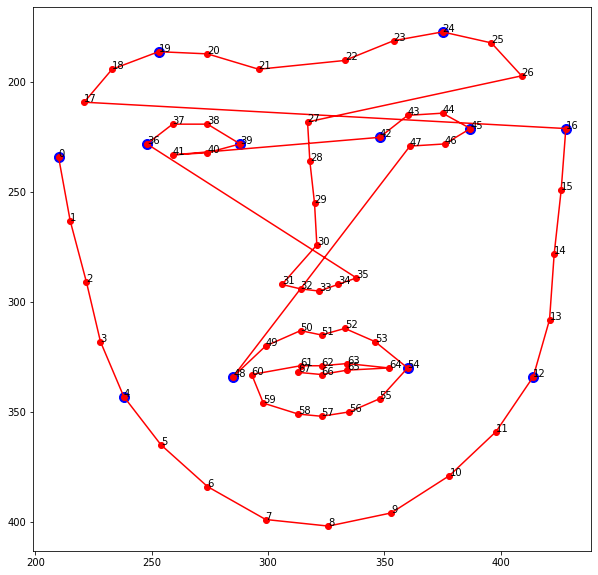

In [ ]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/shape_predictor_68_face_landmarks (2).dat")

img = cv2.imread("/content/jessica4-a.jpg")

# convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# detect faces in the image
faces_in_image = detector(img_gray, 0)
for face in faces_in_image:
	

	# assign the facial landmarks
	landmarks = predictor(img_gray, face)

	# unpack the 68 landmark coordinates from the dlib object into a list 
	landmarks_list = []
	for i in range(0, landmarks.num_parts):
		landmarks_list.append((landmarks.part(i).x, landmarks.part(i).y))


	# for each landmark, plot and write number
	for landmark_num, xy in enumerate(landmarks_list, start = 1):
		cv2.circle(img, (xy[0], xy[1]), 1, (168, 0, 20), -1)
		cv2.putText(img, str(landmark_num),(xy[0]-7,xy[1]+5), cv2.FONT_HERSHEY_SIMPLEX, 0.4,(255,255,255), 1)


coord = (dict(list(enumerate(landmarks_list,start =1))))

coord1= (list(coord.values()))

Z = []
maps = []
cord = ((list(enumerate(landmarks_list,start =0))))

d_coord = (dict(list(enumerate(landmarks_list,start =0))))
for i in range(len(coord1)):
	Z.append(cord[i][0])


for x in range(0,len(landmarks_list)):
	maps.append(d_coord[x])

x,y = np.array(maps).T

fig,ax = plt.subplots(figsize = (10,10))
ax.plot(x,y, "-o", color = 'red')
plt.gca().invert_yaxis()
for i, txt in enumerate(Z):
	ax.annotate(txt, (x[i], y[i]))

vp = [0,16,4,12,19,24,36,45,39,42,48,54]
sp = []

for x in vp:
	sp.append(d_coord[x])

x1,y1 = np.array(sp).T
ax.scatter(x1,y1,100,color = "blue")

d1 = []
d2 = []

vp1 = [[0,16],[4,12],[19,24],[36,45],[39,42],[48,54]]
for x in vp1:
	d1.append(d_coord[x[0]])
	d2.append(d_coord[x[1]])  

diff = []
for x in range(len(d1)):
	res = tuple(map(lambda i, j: abs(i-j), d1[x],d2[x]))
	diff.append(res)
print(diff)


In [ ]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/shape_predictor_68_face_landmarks (2).dat")

img = [cv2.imread(file) for file in glob.glob("/content/drive/My Drive/Faces/*.jpg")]
faces_in_image =[]
diff = []
for fn in img:
  img_gray = cv2.cvtColor((fn), cv2.COLOR_BGR2GRAY)
  faces_in_image.append(detector(img_gray, 0))
  
  for face in faces_in_image:
    landmarks = predictor(img_gray, face[0])

    # unpack the 68 landmark coordinates from the dlib object into a list 
    landmarks_list = []
    for i in range(0, landmarks.num_parts):
      landmarks_list.append((landmarks.part(i).x, landmarks.part(i).y))


    # for each landmark, plot and write number
    for landmark_num, xy in enumerate(landmarks_list, start = 1):

      cv2.circle(fn, (xy[0], xy[1]), 1, (168, 0, 20), -1)
      cv2.putText(fn, str(landmark_num),(xy[0]-7,xy[1]+5), cv2.FONT_HERSHEY_SIMPLEX, 0.4,(255,255,255), 1)


  coord = (dict(list(enumerate(landmarks_list,start =1))))
  coord1= (list(coord.values()))

  Z = []
  maps = []
  cord = ((list(enumerate(landmarks_list,start =0))))

  d_coord = (dict(list(enumerate(landmarks_list,start =0))))
  for i in range(len(coord1)):
    Z.append(cord[i][0])


  for x in range(0,len(landmarks_list)):
    maps.append(d_coord[x])

  x,y = np.array(maps).T

  '''fig,ax = plt.subplots(figsize = (10,10))
  ax.plot(x,y, "-o", color = 'red')
  plt.gca().invert_yaxis()
  for i, txt in enumerate(Z):
    ax.annotate(txt, (x[i], y[i]))'''

  vp = [0,16,4,12,19,24,36,45,39,42,48,54]
  sp = []

  for x in vp:
    sp.append(d_coord[x])

  '''x1,y1 = np.array(sp).T
  ax.scatter(x1,y1,100,color = "blue")'''

  d1 = []
  d2 = []

  vp1 = [[0,16],[4,12],[19,24],[36,45],[39,42],[48,54]]
  for x in vp1:
    d1.append(d_coord[x[0]])
    d2.append(d_coord[x[1]])  


  for x in range(len(d1)):
    res = tuple(map(lambda i, j: abs(i-j), d1[x],d2[x]))
    diff.append(res)



df1 = pd.DataFrame(diff,columns=['X','Y'])
'''df = df1.rename(index = {0: "WOF",
                         1: "WOJ",
                         2: 'WOEB',
                         3: 'WOE',
                         4: 'WOTD',
                         5: "WOM"} )'''



print(df1.head(21))



In [ ]:
coord = dict(list(enumerate(landmarks_list)))


key = []
ratio_dict = {
    "Middle Eye": (abs(abs(coord[42][0]-coord[45][0])/2)-(abs(coord[38][0]-coord[39][0])/2))
    "Mouth Width": abs(coord[48][0]-coord[54][0]),
    "Nose Width": abs(coord[31][0]-coord[35][0]),
    "Interocular Distance": abs(coord[39][0]-coord[42][0]),
    "Lip Chin" : abs(coord[62][0]-coord[8][0]),  
    #"Eye Fissure Width": [(coord[42],coord[45]),(coord[36],coord[39])],
    "Lip Height": abs(coord[57][1]-coord[51][1]),
    "Face Width": abs(coord[0][0]-coord[78][0]),
    "Nose to Lip": abs(coord[33][1]-coord[62][1]),
    "Nose to Chin": abs(coord[33][1]-coord[8][1]),
    "Width of Lip": abs(coord[48][0]-coord[64][0]),
}


def fin_ratio(s,num,deno):
  return(s,(num/deno))

print("Tom Brady")
print(fin_ratio("Middle Eye to Interocular Width", ratio_dict["Middle Eye"], ratio_dict["Interocular Distance"]))
print(fin_ratio("Middle Eye to Nose Width", ratio_dict["Middle Eye"], ratio_dict["Nose Width"]))
print(fin_ratio("Mouth width to Interocular Width", ratio_dict["Mouth Width"], ratio_dict["Interocular Distance"]))

print(fin_ratio("Lip Chin to Interocular", ratio_dict["Lip Chin"], ratio_dict["Interocular Distance"]))
print(fin_ratio("Lip chin to Nose Width", ratio_dict["Lip Chin"], ratio_dict["Nose Width"]))

print(fin_ratio("Interocular dstance to lip height", ratio_dict["Interocular Distance"], ratio_dict["Lip Height"]))
print(fin_ratio("Nose width to lip height", ratio_dict["Nose Width"], ratio_dict["Lip Height"]))
print(fin_ratio("Lip height to nose-mouth distance", ratio_dict["Lip Height"], ratio_dict["Nose to Lip"]))
print(fin_ratio("Nose width to nose-mouth distance", ratio_dict["Nose Width"], ratio_dict["Nose to Lip"]))
print(fin_ratio("Mouth width to nose width", ratio_dict["Mouth Width"], ratio_dict["Nose Width"]))
print(fin_ratio("Interocular dstance to nose width", ratio_dict["Interocular Distance"], ratio_dict["Nose Width"]))




